**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Add ```/path/to/your/folder``` to load the images

In [80]:
cartoon = cv2.imread("/content/drive/MyDrive/LS_Week3/images/cartoon.bmp")
cartoon_y = cv2.imread("/content/drive/MyDrive/LS_Week3/images/cartoon_y.jpg")
girl = cv2.imread("//content/drive/MyDrive/LS_Week3/images/girl.png") #grayscale image
girl_y = cv2.imread("/content/drive/MyDrive/LS_Week3/images/girl_y.jpg")
fingerprint = cv2.imread("/content/drive/MyDrive/LS_Week3/images/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/drive/MyDrive/LS_Week3/images/fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

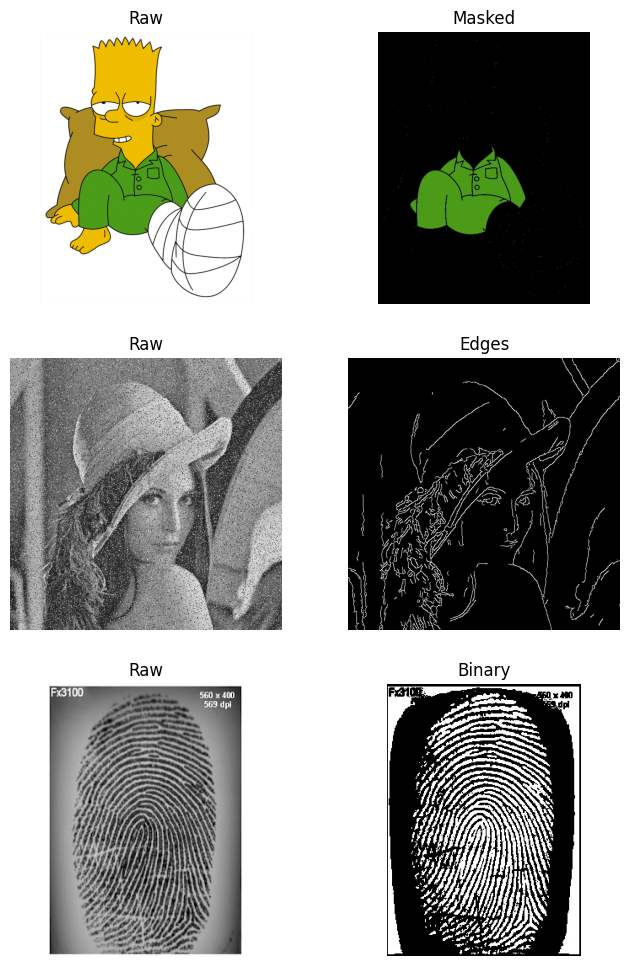

In [4]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [46]:
#START CODE HERE (Do all your processing here)
def limits(color):
  c = np.uint8([[color]])
  hsvc = cv2.cvtColor(c,cv2.COLOR_BGR2HSV)
  l = hsvc[0][0][0] - 20,100,100
  r = hsvc[0][0][0] + 20,255,255
  return np.array(l,dtype = np.uint8),np.array(r, dtype = np.uint8)

color = cartoon[cartoon.shape[0]//2,cartoon.shape[1]//2]
left, right = limits(color)

hsv_cartoon = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_cartoon,left,right)

cartoon_out = cv2.bitwise_and(cartoon, cartoon, mask = mask)

cartoon_y_mentee = cv2.cvtColor(cartoon_out,cv2.COLOR_BGR2RGB)

#END CODE HERE (the final processed image should be cartoon_y_mentee)

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

In [119]:
#START CODE HERE (Do all your processing here)

blurred_girl = cv2.medianBlur(girl, 5)
edges = cv2.Canny(blurred_girl, 90, 150)
ret, edges_th = cv2.threshold(edges, 50, 255, cv2.THRESH_BINARY)

girl_y_mentee = edges_th

#END CODE HERE (the final processed image should be girl_y_mentee)

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [124]:
#START CODE HERE (Do all your processing here)

ret, fingerprint_th = cv2.threshold(fingerprint, 100, 255, cv2.THRESH_BINARY_INV)

fingerprint_y_mentee = fingerprint_th #(in Binary format only i.e. pixel intensity = 0 or 255)

#END CODE HERE (the final processed image should be fingerprint_y_mentee)

## Comparison

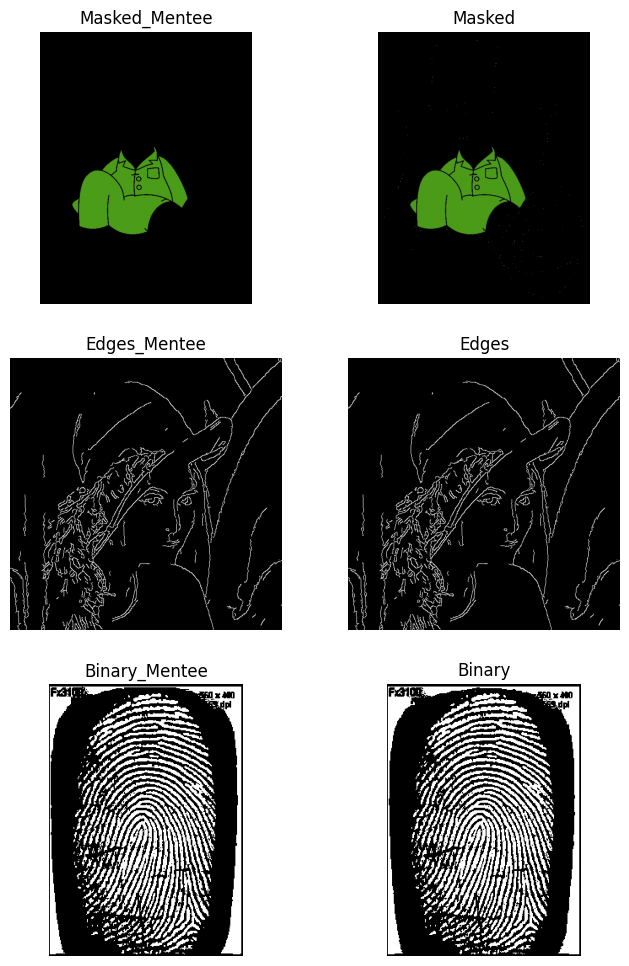

In [125]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()